**Random Forest on Breast Cancer Dataset**

 **Goal:** Use the Random Forest algorithm to classify breast cancer as malignant or benign
 based on medical features.

In [1]:
!pip install pandas scikit-learn matplotlib seaborn

**Load the Dataset**

Use the built-in breast cancer dataset from scikit-learn .

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer  # Dataset
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
data = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Add target (0 = malignant, 1 = benign)

# Show first few rows
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

**Explore the Data**

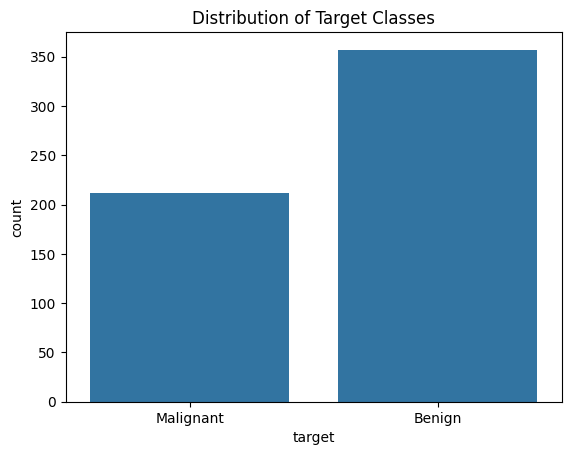

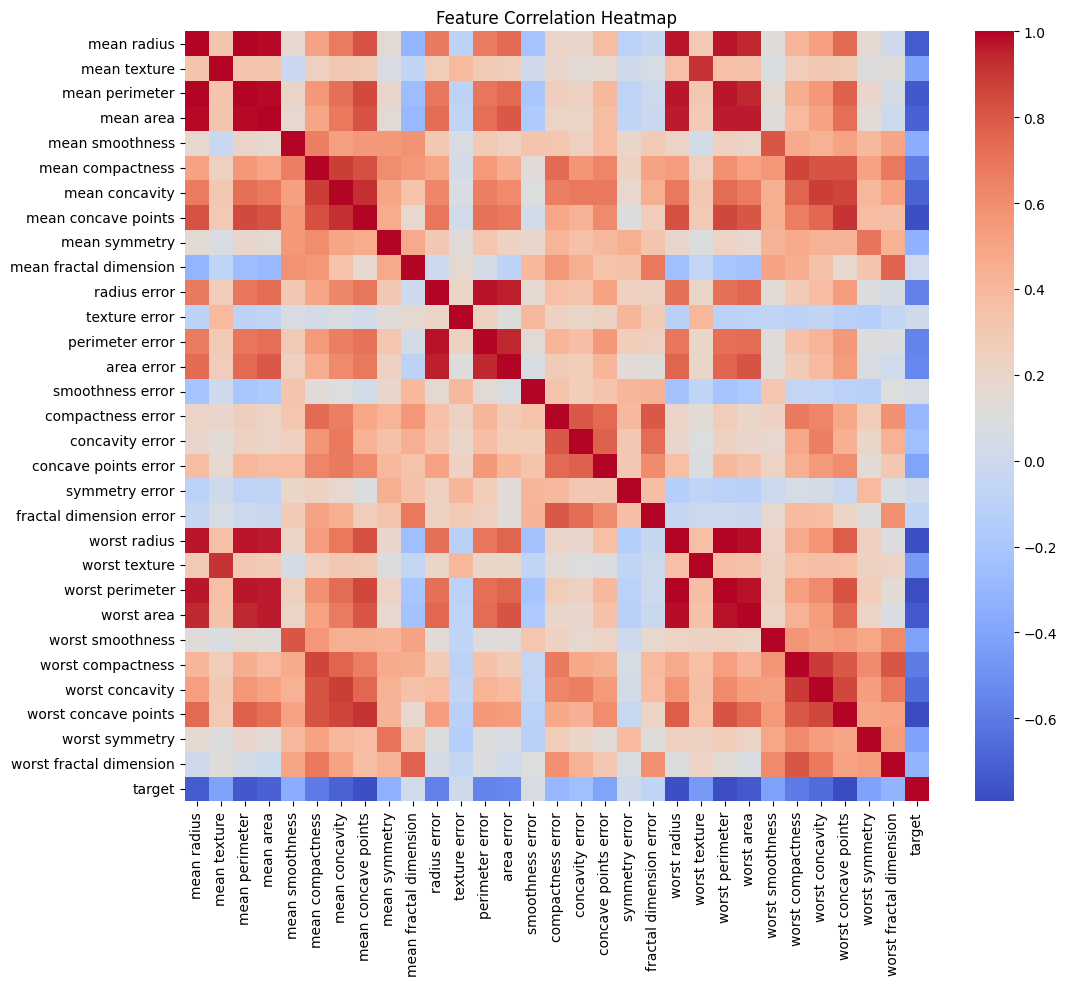

In [4]:
# Visualize class distribution
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Classes')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()
# Display correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Prepare Data for Modeling**

In [6]:
# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42
)

**Train the Random Forest Model**

In [7]:
# Create the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluate the Model**

Accuracy Score: 0.9707602339181286

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



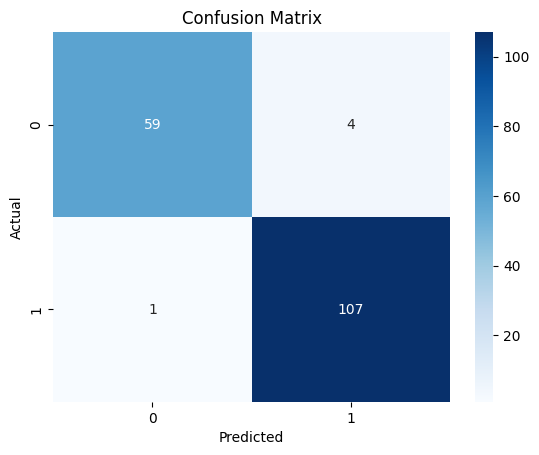

In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Feature Importance Plot**

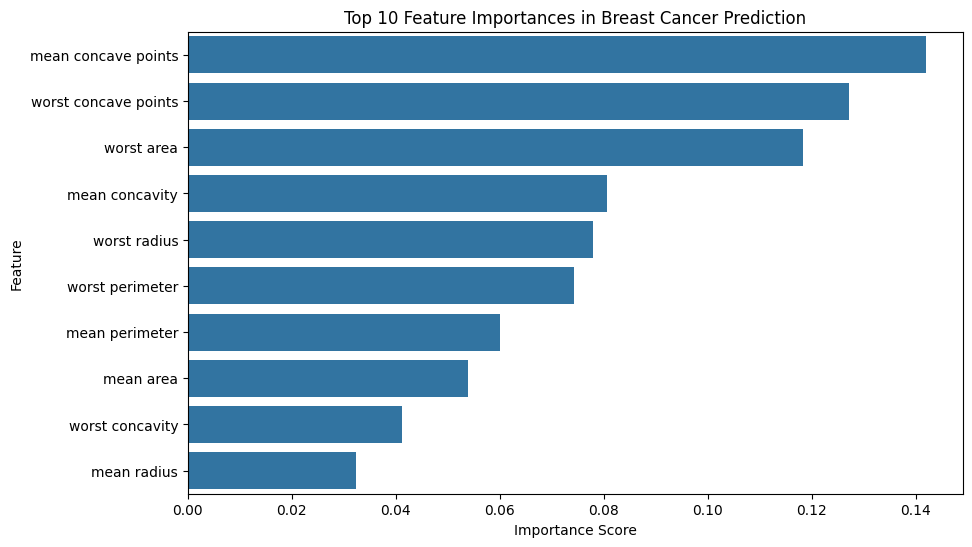

In [11]:
# Visualize most important features
importances = model.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances in Breast Cancer Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

**✅ Project Summary: Breast Cancer Prediction Using Random Forest**

In this project, we used a Random Forest Classifier to predict whether a tumor is malignant (cancerous) or benign (non-cancerous) based on features extracted from cell images.

**📊 Dataset Overview:**

The dataset is provided by scikit-learn and contains 30 numerical features.

The target variable:

*   0: Malignant
*   1: Benign

**🎯 Model Performance:**
Accuracy Score: 97.07%

**Precision & Recall:**

*  Malignant: Very high precision and recall (~0.96)

*  Benign: Even higher performance (~0.98–0.99)

The Confusion Matrix shows very few misclassifications, indicating strong generalization.

**🔍 Top Influential Features:**
The top 3 features contributing most to prediction were:
*   mean concave points
*   worst concave points
*   worst area
These features had the highest importance scores in the trained model and can be critical for understanding tumor characteristics.

**🧠 Conclusion:**

The Random Forest model achieved high accuracy and is well-suited for binary classification tasks like cancer detection.
Feature importance analysis provides valuable insight into the most relevant factors affecting breast cancer diagnosis, which can support medical professionals in decision-making.